<a href="https://colab.research.google.com/github/DEEPALIYADAV28/PRODIGY_DS_03/blob/main/PRODIGY_TASK_03ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Path to your outer ZIP file
zip_file_path = '/content/drive/MyDrive/bank+marketing.zip'

# Function to extract ZIP files
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract the outer ZIP file
outer_extract_path = '/content/extracted_files'
extract_zip(zip_file_path, outer_extract_path)

# Paths to the inner ZIP files
inner_zip_main = os.path.join(outer_extract_path, 'bank.zip')
inner_zip_additional = os.path.join(outer_extract_path, 'bank-additional.zip')

# Extract the inner ZIP files
extract_zip(inner_zip_main, os.path.join(outer_extract_path, 'bank'))
extract_zip(inner_zip_additional, os.path.join(outer_extract_path, 'bank-additional'))

# Path to the extracted CSV files
df_main_path = os.path.join(outer_extract_path, 'bank', 'bank.csv')
df_additional_path = os.path.join(outer_extract_path, 'bank-additional', 'bank-additional', 'bank-additional-full.csv')

# Load the specific CSV files into pandas DataFrames
df_main = pd.read_csv(df_main_path, sep=';')
df_additional = pd.read_csv(df_additional_path, sep=';')


In [ ]:
df = df_main
df.head()
df.isnull().sum()  # Check for missing values


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

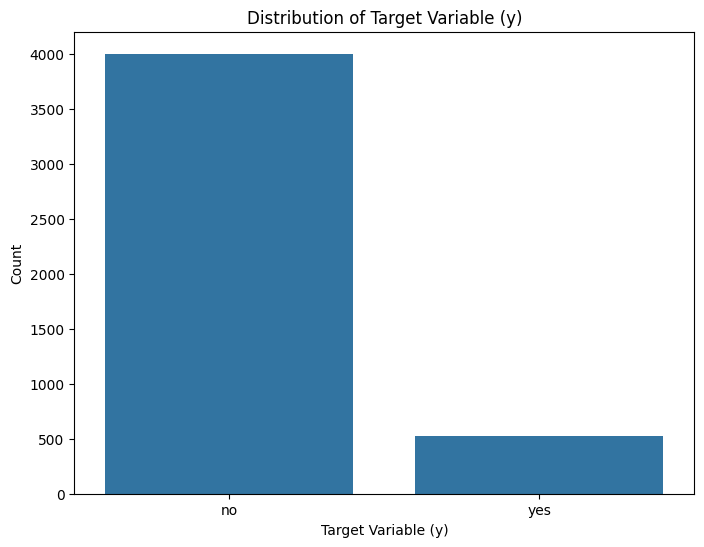

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()


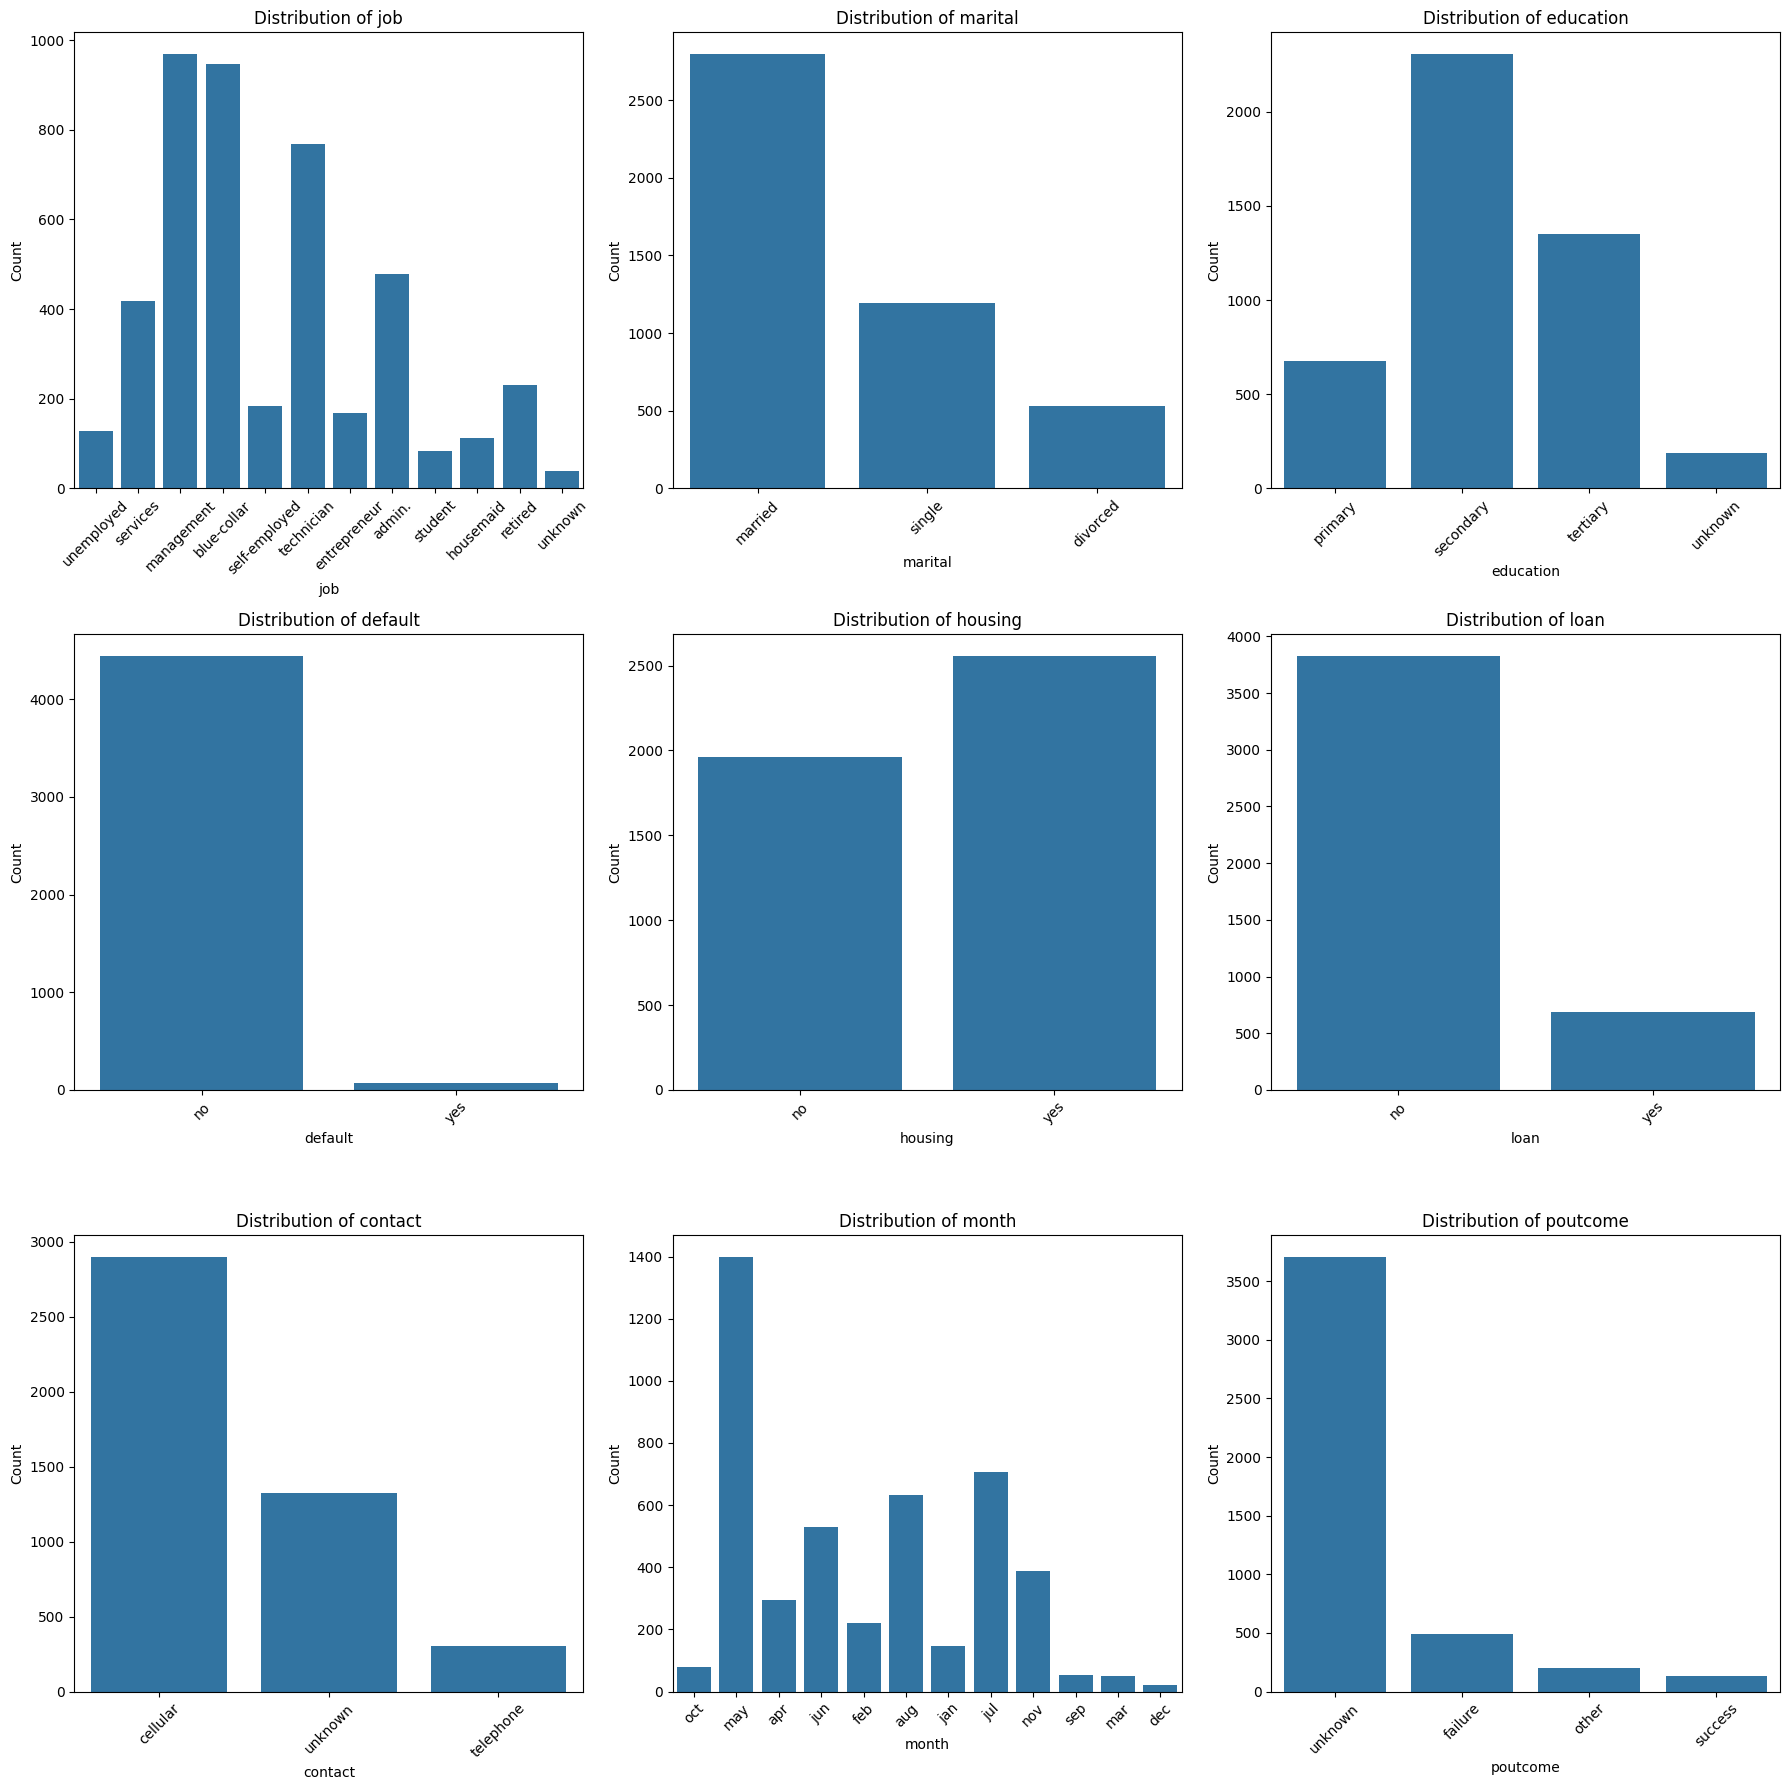

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('y_yes', axis=1)
y = df['y_yes']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3164, 42) (1357, 42) (3164,) (1357,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.87


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      1205
        True       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357

Confusion Matrix:
[[1113   92]
 [  85   67]]


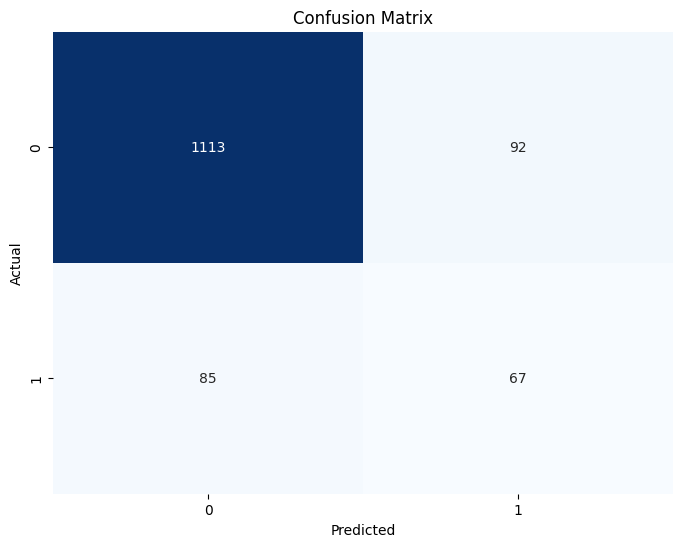

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


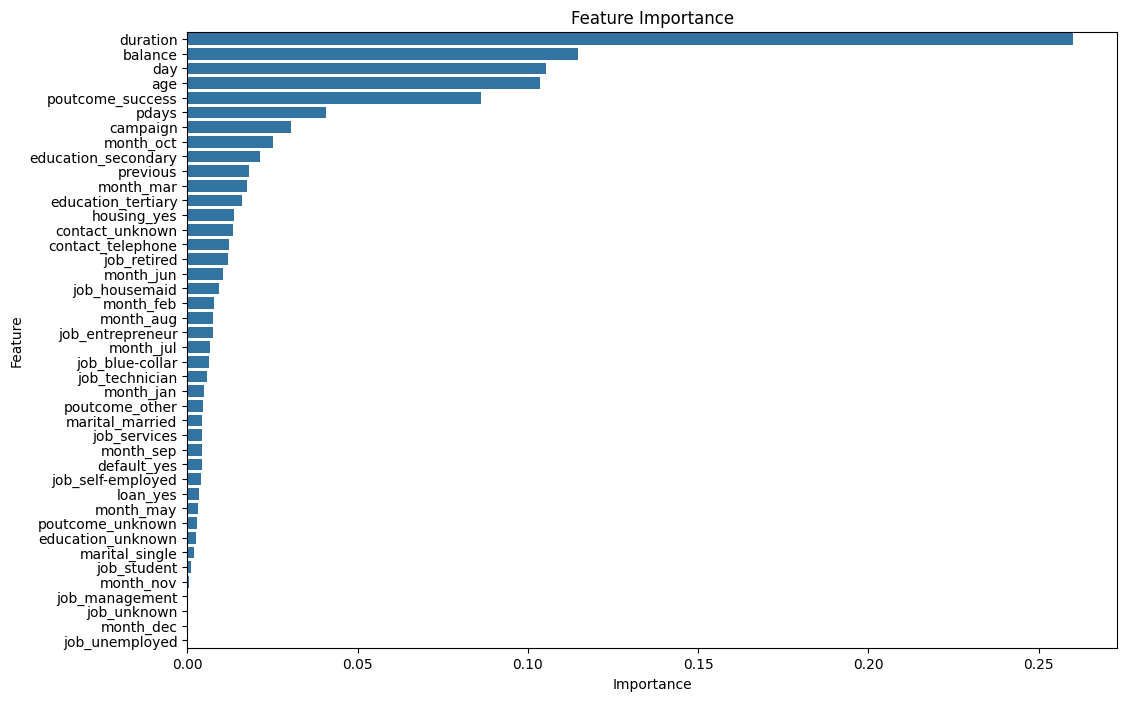

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
